In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 
from matplotlib import style 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#here embarked,cabin and age have null values 
#since cabin is not important lets drop it 
newdf=df.drop(columns='Cabin',axis=1)

In [7]:
#for unavailable age  lets consider the mean age 
newdf['Age'].fillna(newdf['Age'].mean(),inplace=True)

In [8]:
#for unavailable embarked lets consider the mode
newdf['Embarked'].fillna(newdf['Embarked'].mode()[0],inplace=True)

In [9]:
newdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#Let’s convert sex amd embarked  into integer type values, and transform it into a categorical column:
newdf=newdf.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

0    549
1    342
Name: Survived, dtype: int64


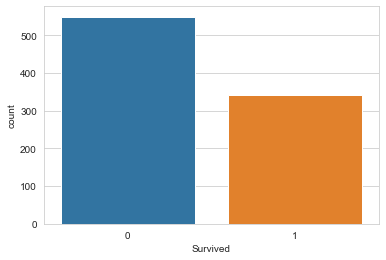

In [11]:
sns.set_style('whitegrid')
sns.countplot(data=df, x="Survived")
print(newdf.Survived.value_counts())

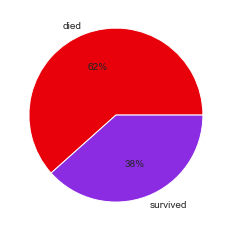

In [12]:
data=newdf.Survived.value_counts()
label=['died','survived']
colors =sns.color_palette('bright')[3:5]
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%')
plt.show()

0    549
1    342
Name: Survived, dtype: int64


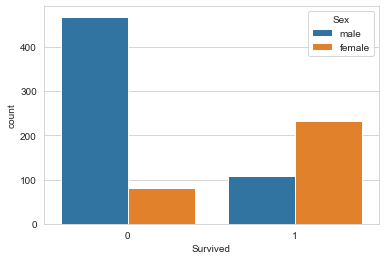

In [13]:
sns.set_style('whitegrid')
sns.countplot(data=df, x="Survived" , hue='Sex')
print(newdf.Survived.value_counts())

<AxesSubplot:xlabel='Survived', ylabel='count'>

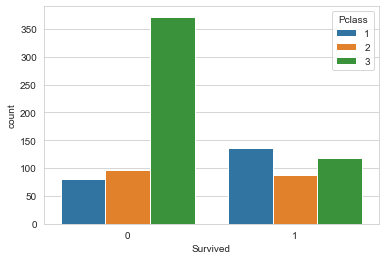

In [14]:
sns.set_style('whitegrid')
sns.countplot(data=df, x="Survived" , hue='Pclass')


<AxesSubplot:xlabel='Survived', ylabel='count'>

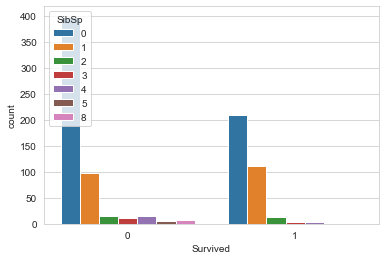

In [15]:
sns.set_style('whitegrid')
sns.countplot(data=df, x="Survived" , hue='SibSp')


<AxesSubplot:xlabel='Age', ylabel='Count'>

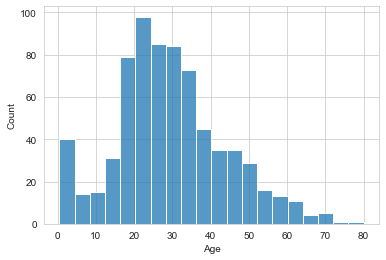

In [16]:
sns.histplot(data=df, x="Age")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

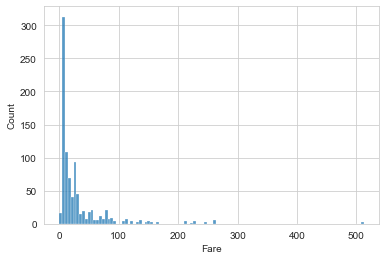

In [17]:
sns.histplot(data=df, x="Fare")

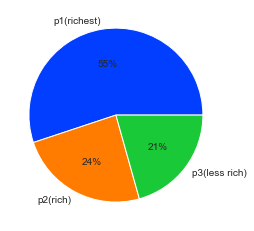

In [30]:
data=newdf.Pclass.value_counts()
label=['p1(richest)','p2(rich)','p3(less rich)']
colors =sns.color_palette('bright')[0:3]
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

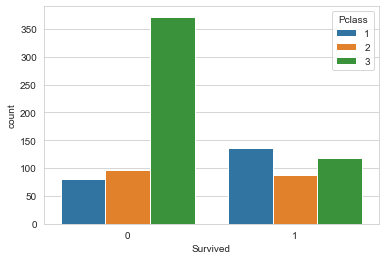

In [19]:
sns.set_style('whitegrid')
sns.countplot(data=df, x="Survived" , hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

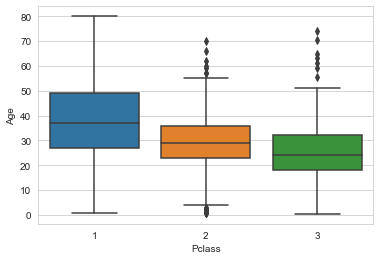

In [20]:
sns.boxplot(x=df['Pclass'] , y = df['Age'])

In [21]:
#lets drop unimportant columns
newdf.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [22]:
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# training model 

In [23]:
X = newdf.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = newdf['Survived']

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
model=LogisticRegression()
model.fit(X_train,Y_train)


C:\Users\lenovo\anaconda5\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
X_train_prediction =model.predict(X_train)

In [27]:
print(accuracy_score(Y_train,X_train_prediction))

0.8075842696629213


In [28]:
X_test_prediction =model.predict(X_test)
print(accuracy_score(Y_test,X_test_prediction))

0.7821229050279329


# testing with a random input 

In [29]:
#Now let’s check for a random Person using random data from the unedited table from Kaggle.
input_data = (3,0,35,0,0,8.05,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = model.predict(input_data_reshaped)
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

Dead


C:\Users\lenovo\anaconda5\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
